In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading Clean Data and Selecting Date and Stat Lines**

In [40]:
game_stats = pd.read_csv("../data/processed/clean_lakers_stats.csv")
game_stats = game_stats[['Season', 'Abbreviation', 'Team', 'Date', 'MATCHUP',
       'W/L', 'MIN', 'FGM', 'FGA', 'FG%', 'FG3M', 'FG3A', 'FG3%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF',
       'PFD', 'PTS', '+/-']]

games = pd.read_csv("../data/processed/clean_lakers_games.csv")
games = games[['Date', 'Home Team', 'Home Score', 'Visitor Team','Visitor Score']]

**Merging Datasets**

In [41]:
merged = pd.merge(game_stats, games)
merged['Date'] = pd.to_datetime(merged['Date'])

**Getting the Home vs. Away Game Stats to Find Opponent Points**

In [42]:
lakers_at_home = merged.loc[(merged['Home Team'] == 'Los Angeles Lakers')]
lakers_at_away = merged.loc[(merged['Visitor Team'] == 'Los Angeles Lakers')]

pts_gaveup_at_home = lakers_at_home['Visitor Score'].sum()
pts_gaveup__at_away = lakers_at_away['Home Score'].sum()
points_allowed = pts_gaveup_at_home + pts_gaveup__at_away

<h1>Regular Season Statistics (82 Games)<h1>

In [43]:
# WINS/LOSSES/W%

wins = game_stats['W/L'] == 'W'
losses = game_stats['W/L'] == 'L'
total_wins = wins.sum()
total_losses = losses.sum()
win_perc = total_wins/82

# FIELD GOAL AND WIN PERCENTAGE AVERAGES 

averages = merged[['FG%','FG3%', 'FT%']]
averages  = pd.DataFrame(averages.mean()*100).reset_index().rename(columns = {'index':'Stat', 0: 'Mean'})
averages.loc[len(averages.index)] = ['W%', win_perc*100]
averages['Description'] = ['Field Goal Percentage','3-Point Field Goal Percentage', 'Free Throw Percentage', 'Win Percentage']
print('Average FG and Win Percentages for Full Season')
averages.round(1)

Average FG and Win Percentages for Full Season


,Stat,Mean,Description
0,FG%,48.3,Field Goal Percentage
1,FG3%,34.8,3-Point Field Goal Percentage
2,FT%,77.3,Free Throw Percentage
3,W%,52.4,Win Percentage


In [44]:
stats = game_stats[['BLK', 'AST', 'REB', 'OREB', 'DREB', 'TOV', 'STL', 'PTS', 'FGM', 'FG3M', 'FTM', 'PF']]
stats  = pd.DataFrame(stats.sum()).reset_index().rename(columns = {'index':'Stat', 0: 'Total'})

# Adding Points Allowed, Wins, and Losses 
stats.loc[len(stats.index)] = ['PA', points_allowed]
stats.loc[len(stats.index)] = ['W', total_wins]
stats.loc[len(stats.index)] = ['L', total_losses]
stats['Description'] = ['Blocks','Assists','Rebounds', 'Offensive Rebounds', 'Defensive Rebounds', 'Turnovers', 'Steals',
                        'Points','Field Goals Made', '3-Point Field Goals Made', 'Free Throws Made', 'Personal Fouls', 'Points Allowed', 'Wins', 'Losses' ]
print('Total Stat Counts for Full Season')
stats

Total Stat Counts for Full Season


,Stat,Total,Description
0,BLK,378.0,Blocks
1,AST,2072.0,Assists
2,REB,3748.0,Rebounds
3,OREB,818.0,Offensive Rebounds
4,DREB,2930.0,Defensive Rebounds
5,TOV,1154.0,Turnovers
6,STL,526.0,Steals
7,PTS,9608.0,Points
8,FGM,3516.0,Field Goals Made
9,FG3M,885.0,3-Point Field Goals Made


<h1>Getting the Games Before the All Star Break (Last Game on Feb/15/2023)<h1>


In [45]:
before_ASB = merged.loc[(merged['Date'] >= '2022/10/18') & (merged['Date'] <= '2023/02/15')]
total_games_before_ASB = len(before_ASB)
before_wins = before_ASB['W/L'] == 'W'
before_losses = before_ASB['W/L'] == 'L'
before_total_wins = before_wins.sum()
before_total_losses = before_losses.sum()
before_win_percentage = before_total_wins/total_games_before_ASB

print(f'The Lakers played {total_games_before_ASB} games before the All-Star Break and went {before_total_wins}-{before_total_losses}')

stats_before = [['Games Played',total_games_before_ASB], ['Wins', before_total_wins],['Losses', before_total_losses], ['Win Percentage',before_win_percentage * 100]]
before = pd.DataFrame(stats_before, columns = ['Stat', 'Total']).round(1)
before

The Lakers played 59 games before the All-Star Break and went 27-32


,Stat,Total
0,Games Played,59.0
1,Wins,27.0
2,Losses,32.0
3,Win Percentage,45.8


<h1>Getting the Games After the All Star Break<h1>

In [46]:
after_ASB = merged.loc[(merged['Date'] >= '2023/02/23') & (merged['Date'] <= '2023/04/09')]
total_games_after_ASB = len(after_ASB)

after_wins = after_ASB['W/L'] == 'W'
after_losses = after_ASB['W/L'] == 'L'

after_total_wins = after_wins.sum()
after_total_losses = after_losses.sum()
after_win_percentage = after_total_wins/total_games_after_ASB

print(f'The Lakers played {total_games_after_ASB} games after the All-Star Break and went {after_total_wins}-{after_total_losses}')


stats_after = [['Games Played',total_games_after_ASB], ['Wins', after_total_wins],['Losses', after_total_losses], ['Win Percentage',after_win_percentage * 100]]
after = pd.DataFrame(stats_after, columns = ['Stat', 'Total']).round(1)
after

The Lakers played 23 games after the All-Star Break and went 16-7


,Stat,Total
0,Games Played,23.0
1,Wins,16.0
2,Losses,7.0
3,Win Percentage,69.6


Line Graph for W/L Over Time

In [47]:
# BEFORE ALL STAR BREAK WINS AND LOSSES PER MONTH
WinsLossesbefore_ASB = before_ASB.copy()
WinsLossesbefore_ASB =  WinsLossesbefore_ASB[['Date', 'W/L']]
WinsLossesbefore_ASB['Year' ]= WinsLossesbefore_ASB['Date'].dt.year
WinsLossesbefore_ASB['Month' ]= WinsLossesbefore_ASB['Date'].dt.month
WinsLossesbefore_ASB['Year/Month'] = WinsLossesbefore_ASB['Year'].astype(str) + '/' + WinsLossesbefore_ASB['Month'].astype(str)
WinsLossesbefore_ASB = WinsLossesbefore_ASB.drop(columns = ['Date', 'Month', 'Year'])

WinsBEFORE = WinsLossesbefore_ASB.loc[(WinsLossesbefore_ASB['W/L'] == 'W')]
LossesBEFORE = WinsLossesbefore_ASB.loc[(WinsLossesbefore_ASB['W/L'] == 'L')]

W_before = pd.DataFrame(WinsBEFORE['Year/Month'].value_counts()).reset_index()
W_before = W_before.sort_values(by=['Year/Month'])

L_before = pd.DataFrame(LossesBEFORE['Year/Month'].value_counts()).reset_index()
L_before = L_before.sort_values(by=['Year/Month'])
# POST ALL STAR BREAK WINS AND LOSSES PER MONTH
WinsLossesAfter_ASB = after_ASB.copy()
WinsLossesAfter_ASB =  WinsLossesAfter_ASB[['Date', 'W/L']]
WinsLossesAfter_ASB['Year']= WinsLossesAfter_ASB['Date'].dt.year
WinsLossesAfter_ASB['Month']= WinsLossesAfter_ASB['Date'].dt.month
WinsLossesAfter_ASB['Year/Month'] = WinsLossesAfter_ASB['Year'].astype(str) + '/' +  WinsLossesAfter_ASB['Month'].astype(str)
WinsLossesAfter_ASB = WinsLossesAfter_ASB.drop(columns = ['Date', 'Month', 'Year'])

WinsAFTER = WinsLossesAfter_ASB.loc[(WinsLossesAfter_ASB['W/L'] == 'W')]
LossesAFTER = WinsLossesAfter_ASB.loc[(WinsLossesAfter_ASB['W/L'] == 'L')]

W_after = pd.DataFrame(WinsAFTER['Year/Month'].value_counts()).reset_index()
W_after = W_after.sort_values(by=['Year/Month'])

L_after = pd.DataFrame(LossesAFTER['Year/Month'].value_counts()).reset_index()
L_after = L_after.sort_values(by=['Year/Month'])

print('Wins Before ASB:'), print(W_before)
print('Losses Before ASB:'),print(L_before)
print('Wins Affter ASB:'), print(W_after)
print('Losses After ASB:'),print(L_after)

Wins Before ASB:
  Year/Month  count
4    2022/10      1
1    2022/11      7
2    2022/12      7
0     2023/1      9
3     2023/2      3
Losses Before ASB:
  Year/Month  count
3    2022/10      5
1    2022/11      7
0    2022/12      9
2     2023/1      7
4     2023/2      4
Wins Affter ASB:
  Year/Month  count
2     2023/2      2
0     2023/3     10
1     2023/4      4
Losses After ASB:
  Year/Month  count
1     2023/2      1
0     2023/3      5
2     2023/4      1


(None, None)

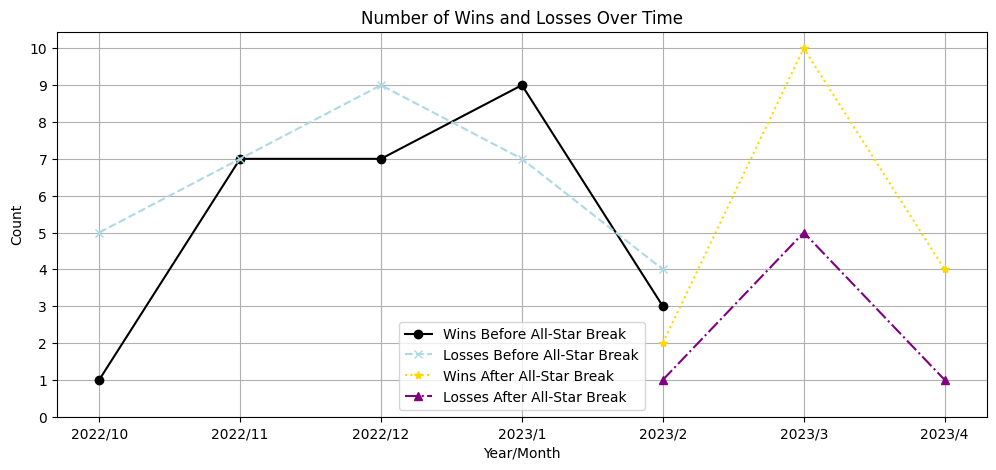

In [48]:
plt.figure(figsize=(12, 5))
plt.title('Number of Wins and Losses Over Time')
plt.xlabel('Year/Month')
plt.ylabel('Count')
plt.plot(W_before['Year/Month'], W_before['count'], label = 'Wins Before All-Star Break', color = 'black', marker = 'o', ls = '-')
plt.plot(L_before['Year/Month'], L_before['count'], label = 'Losses Before All-Star Break', color = 'lightblue', marker = 'x', ls = '--')
plt.plot(W_after['Year/Month'], W_after['count'], label = 'Wins After All-Star Break', color = 'gold', marker = '*', ls = 'dotted')
plt.plot(L_after['Year/Month'], L_after['count'], label = 'Losses After All-Star Break', color = 'purple', marker = '^', ls = '-.')
plt.grid()
plt.yticks(np.arange(0, 11))
plt.legend();

<h1>Getting the Statistics Before and After the All Star Break<h1>

**Full Stats for First 23 Games**

In [49]:
games_1to23 = before_ASB.iloc[0:23]

In [50]:
first23_lakers_at_away = games_1to23.loc[(games_1to23['Visitor Team'] == 'Los Angeles Lakers')]
first23_lakers_at_home = games_1to23.loc[(games_1to23['Home Team'] == 'Los Angeles Lakers')]


first23_wins = games_1to23['W/L'] == 'W'
first23_losses = games_1to23['W/L'] == 'L'

first23_total_wins = first23_wins.sum()
first23_total_losses = first23_losses.sum()
first23_win_percentage = first23_total_wins/len(games_1to23)

pts_gaveup_at_first23_home = first23_lakers_at_home['Visitor Score'].sum()
pts_gaveup__at_first23_away = first23_lakers_at_away['Home Score'].sum()
points_allowed_first23 = pts_gaveup_at_first23_home + pts_gaveup__at_first23_away

In [51]:
first_23_stats = games_1to23[['BLK', 'AST', 'REB', 'OREB', 'DREB', 'TOV', 'STL', 'PTS', 'FGM', 'FG3M', 'FTM', 'PF']]
first_23_stats = first_23_stats.sum()
first_23_stats = pd.DataFrame(first_23_stats).reset_index().rename(columns = {'index':'Stat', 0: 'Total'})
# Adding Points Allowed, Wins, and Losses
first_23_stats.loc[len(first_23_stats.index)] = ['PA', points_allowed_first23]
first_23_stats.loc[len(first_23_stats.index)] = ['W', first23_total_wins]
first_23_stats.loc[len(first_23_stats.index)] = ['L', first23_total_losses]
first_23_stats['Description'] = ['Blocks','Assists','Rebounds', 'Offensive Rebounds', 'Defensive Rebounds', 'Turnovers', 'Steals',
                        'Points','Field Goals Made', '3-Point Field Goals Made', 'Free Throws Made', 'Personal Fouls', 'Points Allowed', 'Wins', 'Losses' ]
print('First 23 Games Total Stats:')
first_23_stats

First 23 Games Total Stats:


,Stat,Total,Description
0,BLK,120.0,Blocks
1,AST,568.0,Assists
2,REB,1054.0,Rebounds
3,OREB,228.0,Offensive Rebounds
4,DREB,826.0,Defensive Rebounds
5,TOV,335.0,Turnovers
6,STL,153.0,Steals
7,PTS,2627.0,Points
8,FGM,969.0,Field Goals Made
9,FG3M,224.0,3-Point Field Goals Made


In [52]:
first23_averages = games_1to23[['FG%','FG3%', 'FT%']]
first23_averages  = pd.DataFrame(first23_averages.mean()*100).reset_index().rename(columns = {'index':'Stat', 0: 'Mean'})
# Adding Win Percentage 
first23_averages.loc[len(first23_averages.index)] = ['W%', first23_win_percentage*100]
first23_averages['Description'] = ['Field Goal Percentage','3-Point Field Goal Percentage', 'Free Throw Percentage', 'Win Percentage']
first23_averages = first23_averages.round(1)
print('First 23 FG and Win Averages:')
first23_averages

First 23 FG and Win Averages:


,Stat,Mean,Description
0,FG%,47.3,Field Goal Percentage
1,FG3%,32.8,3-Point Field Goal Percentage
2,FT%,79.0,Free Throw Percentage
3,W%,43.5,Win Percentage


**Full Stats Post-All Star Break**

In [53]:
afterASB_lakers_at_away = after_ASB.loc[(after_ASB['Visitor Team'] == 'Los Angeles Lakers')]
afterASB_lakers_at_home = after_ASB.loc[(after_ASB['Home Team'] == 'Los Angeles Lakers')]


pts_gaveup_afterASB_home = afterASB_lakers_at_home['Visitor Score'].sum()
pts_gaveup__afterASB_away = afterASB_lakers_at_away['Home Score'].sum()
points_allowed_afterASB = pts_gaveup_afterASB_home + pts_gaveup__afterASB_away

after_asb_stats = after_ASB[['BLK', 'AST', 'REB', 'OREB', 'DREB', 'TOV', 'STL', 'PTS', 'FGM', 'FG3M', 'FTM', 'PF']]
after_asb_stats  = pd.DataFrame(after_asb_stats.sum()).reset_index().rename(columns = {'index':'Stat', 0: 'Total'})
# Adding Points Allowed, Wins, and Losses
after_asb_stats.loc[len(after_asb_stats.index)] = ['PA', points_allowed_afterASB]
after_asb_stats.loc[len(after_asb_stats.index)] = ['W', after_total_wins]
after_asb_stats.loc[len(after_asb_stats.index)] = ['L', after_total_losses]
after_asb_stats['Description'] = ['Blocks','Assists','Rebounds', 'Offensive Rebounds', 'Defensive Rebounds', 'Turnovers', 'Steals',
                        'Points','Field Goals Made', '3-Point Field Goals Made', 'Free Throws Made', 'Personal Fouls', 'Points Allowed', 'Wins', 'Losses' ]
print('Post-ASB Games Total Stats:')
after_asb_stats

Post-ASB Games Total Stats:


,Stat,Total,Description
0,BLK,108.0,Blocks
1,AST,587.0,Assists
2,REB,1076.0,Rebounds
3,OREB,251.0,Offensive Rebounds
4,DREB,825.0,Defensive Rebounds
5,TOV,327.0,Turnovers
6,STL,149.0,Steals
7,PTS,2704.0,Points
8,FGM,966.0,Field Goals Made
9,FG3M,269.0,3-Point Field Goals Made


In [54]:
after_win_percentage = after_total_wins/total_games_after_ASB
after_asb_averages = after_ASB[['FG%','FG3%', 'FT%']]
after_asb_averages  = pd.DataFrame(after_asb_averages.mean()*100).reset_index().rename(columns = {'index':'Stat', 0: 'Mean'})
# Adding Win Percentage
after_asb_averages.loc[len(after_asb_averages.index)] = ['W%', after_win_percentage*100]
after_asb_averages['Description'] = ['Field Goal Percentage','3-Point Field Goal Percentage', 'Free Throw Percentage', 'Win Percentage']
after_asb_averages = after_asb_averages.round(1)
print('Post-ASB FG and Win Averages:')
after_asb_averages

Post-ASB FG and Win Averages:


,Stat,Mean,Description
0,FG%,48.4,Field Goal Percentage
1,FG3%,37.0,3-Point Field Goal Percentage
2,FT%,77.4,Free Throw Percentage
3,W%,69.6,Win Percentage


**Comparing Field Goal Percentage Stats**

In [55]:
diff_percentages = first23_averages[['Stat','Mean']].compare(after_asb_averages[['Stat','Mean']], result_names=('First 23', 'Post ASB'))
diff_percentages = diff_percentages.set_index([pd.Index(['FG%', 'FG3%', 'FT%', 'W%'])])
diff_percentages['Higher Stat'] = np.where((diff_percentages[('Mean', 'First 23')] > diff_percentages[('Mean', 'Post ASB')]), 'First 23', 'Post ASB')
diff_percentages

Mean          Higher Stat
     First 23 Post ASB            
FG%      47.3     48.4    Post ASB
FG3%     32.8     37.0    Post ASB
FT%      79.0     77.4    First 23
W%       43.5     69.6    Post ASB

**Comparing Total Stats**

In [56]:
diff_stats = first_23_stats[['Stat','Total']].compare(after_asb_stats[['Stat','Total']], result_names=('First 23', 'Post ASB'))
diff_stats
diff_stats = diff_stats.set_index([pd.Index(['Blocks', 'Assists', 'Rebounds', 'Offensive Rebounds', 'Defensive Rebounds', 'Turnovers', 'Steals', 'Points', 'Field Goals Made', '3-Point FG Made', 'Freethrows Made', 'Personal Fouls', 'Points Allowed','Wins', 'Losses'])])
diff_stats['Higher Count'] = np.where((diff_stats[('Total', 'First 23')] > diff_stats[('Total', 'Post ASB')]), 'First 23', 'Post ASB')
diff_stats

Total          Higher Count
                   First 23 Post ASB             
Blocks                120.0    108.0     First 23
Assists               568.0    587.0     Post ASB
Rebounds             1054.0   1076.0     Post ASB
Offensive Rebounds    228.0    251.0     Post ASB
Defensive Rebounds    826.0    825.0     First 23
Turnovers             335.0    327.0     First 23
Steals                153.0    149.0     First 23
Points               2627.0   2704.0     Post ASB
Field Goals Made      969.0    966.0     First 23
3-Point FG Made       224.0    269.0     Post ASB
Freethrows Made       465.0    503.0     Post ASB
Personal Fouls        424.0    377.0     First 23
Points Allowed       2649.0   2589.0     First 23
Wins                   10.0     16.0     Post ASB
Losses                 13.0      7.0     First 23

Line Chart For Both Total Stat Counts

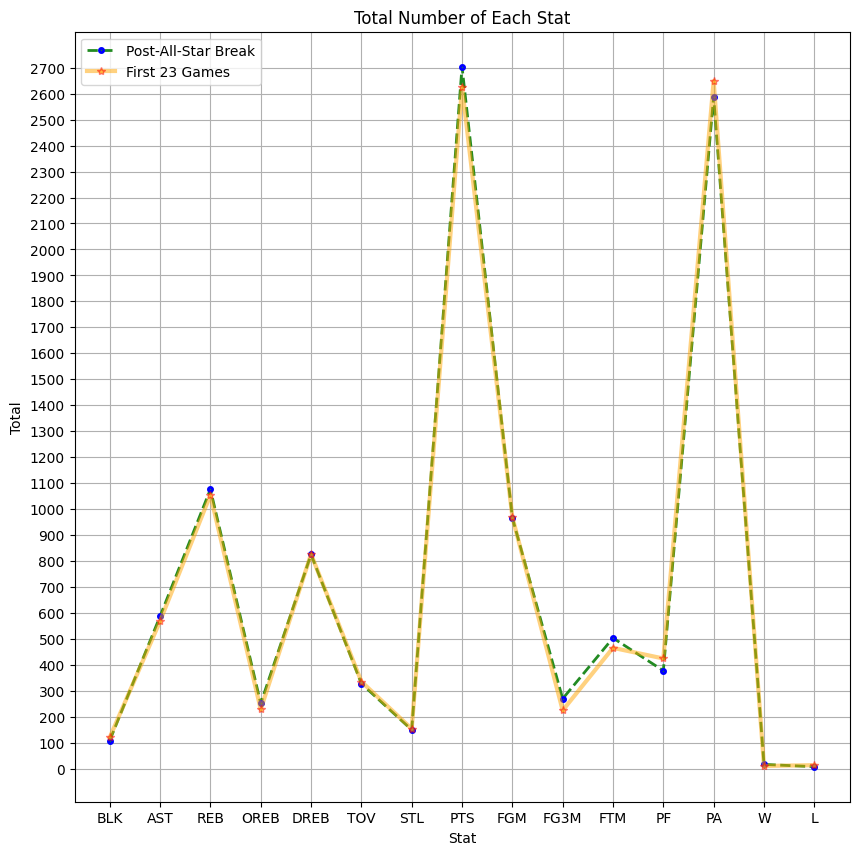

In [57]:
plt.figure(figsize=(10, 10))
plt.title('Total Number of Each Stat')
plt.xlabel('Stat')
plt.ylabel('Total')
plt.plot(after_asb_stats['Stat'], after_asb_stats['Total'], label = 'Post-All-Star Break', color = 'forestgreen',marker = '.', ls='--', lw=2, mew=2, mec='blue')
plt.plot(first_23_stats['Stat'], first_23_stats['Total'], label = 'First 23 Games', color = 'orange', marker = '*', ls='-', lw=3, mec='red', alpha=.5)
plt.grid()
plt.yticks(np.arange(0, 2800, step = 100))
plt.legend();

Line Chart For Both FG and Win % Averages

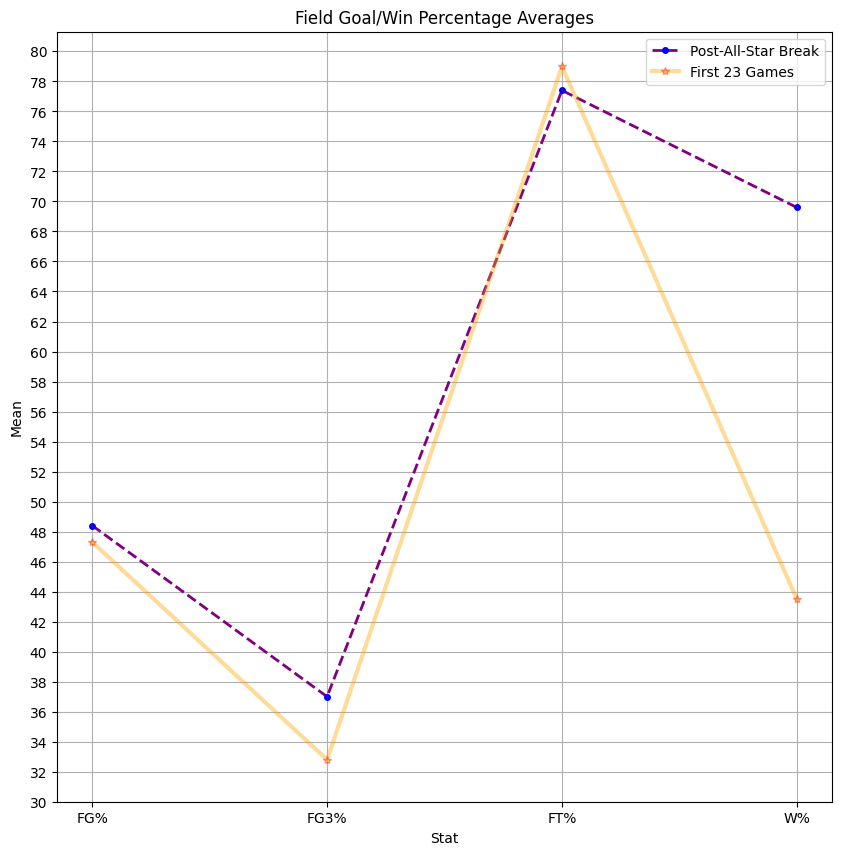

In [58]:
plt.figure(figsize=(10, 10))
plt.title('Field Goal/Win Percentage Averages')
plt.xlabel('Stat')
plt.ylabel('Mean')
plt.plot(after_asb_averages['Stat'], after_asb_averages['Mean'], label = 'Post-All-Star Break', color = 'purple',marker = '.', ls='--', lw=2, mew=2, mec='blue')
plt.plot(first23_averages['Stat'], first23_averages['Mean'], label = 'First 23 Games', color = 'orange', marker = '*', ls='-', lw=3, mec='red', alpha=0.4)
plt.grid()
plt.yticks(np.arange(30, 82, step = 2))
plt.legend();

<h1>Looking at the Correlation Between Each Variables<h1>

correlation between variables in the first 23 games

In [59]:
games_1to23_corr = games_1to23.copy()
games_1to23_corr['Wins'] = (games_1to23['W/L'] == 'W').astype(int)
first23_corr = games_1to23_corr.select_dtypes(include=np.number).drop(columns = ['Visitor Score', 'Home Score', 'MIN', 'REB', 'FTA', 'FGA', 'BLKA', '+/-', 'FG3A', 'FTM', 'FGM', 'FG3M'])
first23 = first23_corr.corr()
first23

,FG%,FG3%,FT%,OREB,DREB,AST,TOV,STL,BLK,PF,PFD,PTS,Wins
FG%,1.000000,0.744354,0.171747,-0.316345,0.142909,0.530811,-0.173631,-0.528192,-0.049222,-0.130059,0.234516,0.858921,0.715485
FG3%,0.744354,1.000000,0.094836,-0.032707,0.013537,0.290622,-0.339269,-0.430509,-0.205387,0.037236,0.145993,0.772527,0.528529
FT%,0.171747,0.094836,1.000000,-0.239765,-0.052260,-0.152798,-0.015470,-0.006225,0.308099,-0.203320,0.119201,0.301432,0.263066
OREB,-0.316345,-0.032707,-0.239765,1.000000,-0.172067,-0.103365,-0.246067,-0.104063,0.121431,-0.003657,-0.373433,-0.139478,-0.110361
DREB,0.142909,0.013537,-0.052260,-0.172067,1.000000,0.474600,0.374072,-0.143143,-0.104347,-0.504197,-0.062437,0.166749,0.412736
AST,0.530811,0.290622,-0.152798,-0.103365,0.474600,1.000000,-0.237201,-0.162499,-0.082272,-0.106940,0.006443,0.493716,0.712025
TOV,-0.173631,-0.339269,-0.015470,-0.246067,0.374072,-0.237201,1.000000,0.266687,0.104252,-0.027736,0.197079,-0.323863,-0.248765
STL,-0.528192,-0.430509,-0.006225,-0.104063,-0.143143,-0.162499,0.266687,1.000000,-0.042306,0.103778,-0.220157,-0.511138,-0.393211
BLK,-0.049222,-0.205387,0.308099,0.121431,-0.104347,-0.082272,0.104252,-0.042306,1.000000,0.087815,0.383414,0.141755,-0.057434
PF,-0.130059,0.037236,-0.203320,-0.003657,-0.504197,-0.106940,-0.027736,0.103778,0.087815,1.000000,0.259700,-0.182236,-0.221638


Looking at the Variables most correlated to WIns before ASB 

In [60]:
first23_column_wins = first23.nlargest(10, 'Wins')['Wins'].index
first23_cm_wins = np.corrcoef(first23[first23_column_wins].values.T)
first23_column_wins.values.tolist()

['Wins', 'PTS', 'FG%', 'AST', 'FG3%', 'DREB', 'FT%', 'PFD', 'BLK', 'OREB']

Heatmap for first 23 game Wins Correlation 

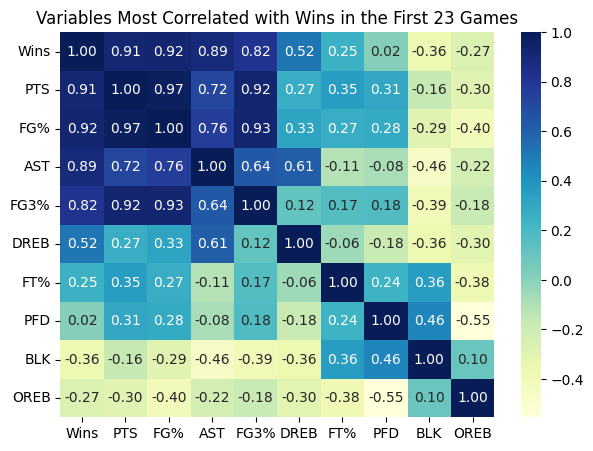

In [61]:
plt.figure(figsize=(7, 5))
sns.heatmap(first23_cm_wins, annot = True, fmt = '.2f', cmap='YlGnBu',
            yticklabels=first23_column_wins.values, xticklabels=first23_column_wins.values)
plt.title('Variables Most Correlated with Wins in the First 23 Games')
plt.show()

Now Looking at the Correlation between variables Post ASB

In [62]:
after_ASB_corr = after_ASB.copy()
after_ASB_corr['Wins'] = (after_ASB_corr['W/L'] == 'W').astype(int)
after_ASB_corr_stats = after_ASB_corr.select_dtypes(include=np.number).drop(columns = ['Visitor Score', 'Home Score', 'MIN', 'REB', 'FTA', 'FGA', 'BLKA', '+/-', 'FG3A', 'FTM', 'FGM', 'FG3M'])
postASB = after_ASB_corr_stats.corr()
postASB

,FG%,FG3%,FT%,OREB,DREB,AST,TOV,STL,BLK,PF,PFD,PTS,Wins
FG%,1.000000,0.397041,-0.071864,-0.361387,-0.049641,0.497745,0.098075,0.060359,0.155115,-0.350500,-0.150988,0.598155,0.306080
FG3%,0.397041,1.000000,0.193172,-0.310957,0.200056,0.134974,0.435863,0.022947,0.205336,-0.015974,-0.191388,0.419627,0.299705
FT%,-0.071864,0.193172,1.000000,-0.129658,0.080728,0.015562,0.450441,0.084483,0.349516,-0.183506,-0.004049,0.135892,0.353805
OREB,-0.361387,-0.310957,-0.129658,1.000000,0.082245,-0.325073,-0.104345,0.450798,-0.036948,0.011571,-0.082852,-0.065239,-0.018690
DREB,-0.049641,0.200056,0.080728,0.082245,1.000000,0.383230,0.161496,-0.297265,0.225825,-0.066775,-0.220131,0.200541,0.496841
AST,0.497745,0.134974,0.015562,-0.325073,0.383230,1.000000,-0.283007,-0.375498,0.166621,-0.326640,-0.184696,0.574071,0.398418
TOV,0.098075,0.435863,0.450441,-0.104345,0.161496,-0.283007,1.000000,0.139883,0.230833,0.188766,-0.164810,-0.194488,-0.147915
STL,0.060359,0.022947,0.084483,0.450798,-0.297265,-0.375498,0.139883,1.000000,-0.291319,0.044287,0.111433,0.045950,0.099762
BLK,0.155115,0.205336,0.349516,-0.036948,0.225825,0.166621,0.230833,-0.291319,1.000000,-0.269729,-0.240743,0.343308,0.219480
PF,-0.350500,-0.015974,-0.183506,0.011571,-0.066775,-0.326640,0.188766,0.044287,-0.269729,1.000000,0.680250,-0.372613,-0.285381


Looking at the variables most correlated to Wins post-ASB


In [63]:
postASB_column_wins = postASB.nlargest(10, 'Wins')['Wins'].index
postASB_cm_wins = np.corrcoef(postASB[postASB_column_wins].values.T)
postASB_column_wins.values.tolist()

['Wins', 'PTS', 'DREB', 'AST', 'FT%', 'FG%', 'FG3%', 'BLK', 'STL', 'PFD']

Heatmap for Post-ASB Wins Correlation 

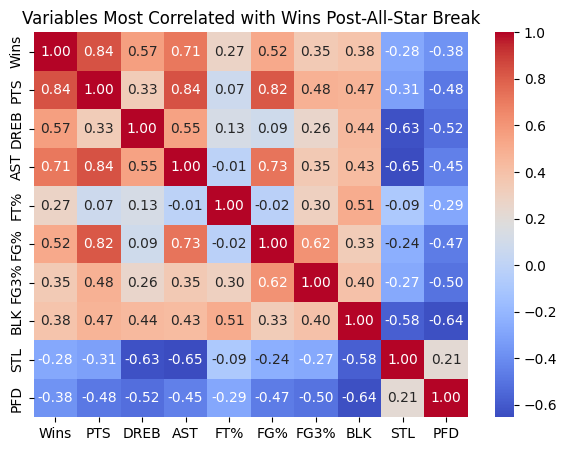

In [64]:
plt.figure(figsize=(7, 5))
sns.heatmap(postASB_cm_wins, annot = True, fmt = '.2f', cmap='coolwarm',
            yticklabels=postASB_column_wins.values, xticklabels=postASB_column_wins.values)
plt.title('Variables Most Correlated with Wins Post-All-Star Break')
plt.show()